<a href="https://colab.research.google.com/github/sharinair14/ML-Projects/blob/main/Payment_Fraud_using_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

**Reading a text file in python**

In [3]:
f=open('/content/payment_fraud.txt','r')
reader=csv.reader(f)

In [4]:
data=pd.read_csv('/content/payment_fraud.txt')

In [5]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [6]:
data.tail()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
39216,986,1,4.836982,creditcard,0.000000,0
39217,1647,1,4.876771,creditcard,377.930556,0
39218,1591,1,4.742303,creditcard,0.000000,0
39219,237,1,4.921318,creditcard,236.082639,0
39220,272,1,5.040929,paypal,0.000694,0


In [7]:
data.shape

(39221, 6)

In [17]:
data.isna().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [8]:
data.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')

In [18]:
data.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


In [15]:
fraud=data[data['label']==1]
valid=data[data['label']==0]

In [16]:
fraud.shape,valid.shape

((560, 6), (38661, 6))

From the above line it is clear that dataset is imbalanced.

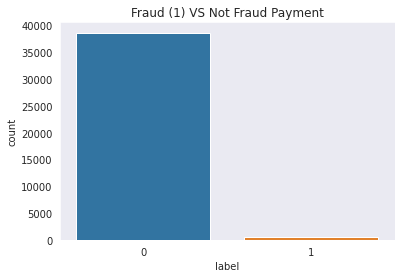

In [26]:
plt.title("Fraud (1) VS Not Fraud Payment")
sns.countplot(x='label',data=data)

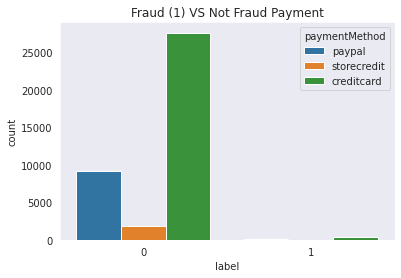

In [27]:
plt.title("Fraud (1) VS Not Fraud Payment")
sns.countplot(x='label',hue='paymentMethod',data=data)

In [37]:
data.groupby('paymentMethod')['label'].count()

paymentMethod
creditcard     28004
paypal          9303
storecredit     1914
Name: label, dtype: int64

This shows 1.4 % of fraud transaction and 98.57% valid transaction.

In [38]:
print('Fraudulent transaction Percent is {} % and non fraudulent transaction percentage is {} %'.format((fraud.shape[0]/data.shape[0])*100,(valid.shape[0]/data.shape[0])*100))

Fraudulent transaction Percent is 1.427806532214885 % and non fraudulent transaction percentage is 98.57219346778511 %


In [52]:
data.groupby(['paymentMethod','label'])['label'].count()

paymentMethod  label
creditcard     0        27594
               1          410
paypal         0         9174
               1          129
storecredit    0         1893
               1           21
Name: label, dtype: int64

From the above data, it is clear that out of all 560 fraud transactions, 410 transaction comes from credit card,129 from paypal and 21 from storecredit. 

Now we will convert the 'paymentMethod' column into numeric column as machine learning algorithm is unable to read categories.

In [54]:
data['paymentMethod']=data['paymentMethod'].map({'creditcard':0,'paypal':1,'storecredit':2})

In [62]:
x=data.drop('label',axis=1)
y=data['label']


**Splitting the dataset into train & test**

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [65]:
x_train.shape,x_test.shape

((31376, 5), (7845, 5))

This dataset contains no missing values and is structured.so I am using logistics regression algorithm to build the model.

In [66]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)

**Evaluating the model**

In [87]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,classification_report,accuracy_score,f1_score

In [89]:
print('Accuracy score',accuracy_score(y_test,ypred))
print('Precision score',precision_score(y_test,ypred))
print('Recall score',recall_score(y_test,ypred))
print('F1 score',f1_score(y_test,ypred))
print('Classification score',classification_report(y_test,ypred))
print('Confusion Matrix',confusion_matrix(y_test,ypred))

Accuracy score 1.0
Precision score 1.0
Recall score 1.0
F1 score 1.0
Classification score               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7719
           1       1.00      1.00      1.00       126

    accuracy                           1.00      7845
   macro avg       1.00      1.00      1.00      7845
weighted avg       1.00      1.00      1.00      7845

Confusion Matrix [[7719    0]
 [   0  126]]


In above confusion matrix, there is no FP and FN cases. All cases are correctly classified as fraud and valid.Furthermore,the accuracy is also 100%.